In [2]:
from bs4 import BeautifulSoup
import requests

all_hyperlinks = []

for page_num in range(1, 3):  #this way it goes thru both pages without having two diff links
    url = f"https://www.lse.ac.uk/student-life/accommodation/search-accommodation?collection=lse-accommodation&pageIndex={page_num}&sort=metaavailability"
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        accommodation_titles = soup.find_all('h2', class_='card__title')
        hyperlinks = []
        for title in accommodation_titles:
            hyperlink = title.find('a')['href']
            hyperlinks.append(hyperlink)
        all_hyperlinks.extend(hyperlinks)

    except Exception as e:
        print("An error occurred:", e)

print(all_hyperlinks)

['http://www.lse.ac.uk/student-life/accommodation/halls/urbanest-westminster-bridge/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/lilian-knowles-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/college-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/international-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/butlers-wharf-residence/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/bankside-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/carr-saunders-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/connaught-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/high-holborn-residence/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/passfield-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/nutford-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/r

In [3]:
from bs4 import BeautifulSoup
import requests

def extract_info(soup):
    room_types_title = soup.find('h3', class_='ataGlance__title--types')
    room_types_list = soup.find('ul', class_='ataGlance__list')
    room_types_items = room_types_list.find_all('li', class_='ataGlance__item')

    facilities_title = soup.find('h3', class_='ataGlance__title')
    facilities_list = soup.find_all('ul', class_='ataGlance__list')[1]  # Get the second ul tag
    facilities_items = facilities_list.find_all('li', class_='ataGlance__item')

    room_types_info = [(item.find('span', class_='ataGlance__name').text.strip(), item.find('span', class_='ataGlance__qty').text.strip()) for item in room_types_items]
    facilities_info = [item.find('span', class_='ataGlance__name').text.strip() for item in facilities_items]

    return room_types_info, facilities_info

accommodation_info = []

for hyperlink in all_hyperlinks:  

    try:
        response = requests.get(hyperlink)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        room_types, facilities = extract_info(soup)
        accommodation_info.append({
            'hyperlink': hyperlink,
            'room_types': room_types,
            'facilities': facilities
        })

    except Exception as e:
        print("An error occurred while processing", hyperlink, ":", e)

for info in accommodation_info:
    print("Hyperlink:", info['hyperlink'])
    print("Room Types:")
    for room_type, quantity in info['room_types']:
        print(room_type, quantity)
    print("Facilities:")
    for facility in info['facilities']:
        print(facility)
    print()

Hyperlink: http://www.lse.ac.uk/student-life/accommodation/halls/urbanest-westminster-bridge/home.aspx
Room Types:
Bed spaces in total 669
Single 246
Single studio 36
Single en suite 331
Twin en suite (shared) 56
Facilities:
24-hour staff cover
Accessible rooms
Bicycle storage
Common room
Communal TV
Computer room
Lift access
Non-smoking
Printing facilities
Projector/Cinema room
Quiet study space
Secure entrance
Self-catered
Self-service laundry
WiFi

Hyperlink: http://www.lse.ac.uk/student-life/accommodation/halls/lilian-knowles-house/home.aspx
Room Types:
Bed spaces in total 365
One bed flat 10
Single studio 31
Single en suite 324
Facilities:
24-hour staff cover
Bicycle storage
Common room
Communal TV
Computer room
Lift access
Non-smoking
Printing facilities
Secure entrance
Self-catered
Self-service laundry
WiFi

Hyperlink: http://www.lse.ac.uk/student-life/accommodation/halls/college-hall/home.aspx
Room Types:
Bed spaces in total 28
Double en suite 4
Single 8
Single en suite 16
Faci

In [82]:
df = pd.DataFrame(accommodation_info)
df['Room Types'] = df['room_types'].apply(lambda x: ', '.join([room[0] for room in x if room[0] != 'Bed spaces in total']))
df['Total Bed Spaces'] = df['room_types'].apply(lambda x: [int(room[1]) for room in x if room[0] == 'Bed spaces in total'][0])
df.drop(['room_types'], axis=1, inplace=True)
df.drop(['Room Types'], axis=1, inplace=True)


unique_facilities = set(facility for sublist in df['facilities'] for facility in sublist)

for facility in unique_facilities:
    df[facility] = df['facilities'].apply(lambda x: 1 if facility in x else 0)
df.drop('facilities', axis=1, inplace=True)
df.rename(columns={'hyperlink': 'Hyperlink'}, inplace=True)
print(df)

                                            Hyperlink  Total Bed Spaces  \
0   http://www.lse.ac.uk/student-life/accommodatio...               669   
1   http://www.lse.ac.uk/student-life/accommodatio...               365   
2   http://www.lse.ac.uk/student-life/accommodatio...                28   
3   http://www.lse.ac.uk/student-life/accommodatio...               106   
4   http://www.lse.ac.uk/student-life/accommodatio...               280   
5   http://www.lse.ac.uk/student-life/accommodatio...               595   
6   http://www.lse.ac.uk/student-life/accommodatio...               155   
7   http://www.lse.ac.uk/student-life/accommodatio...                26   
8   http://www.lse.ac.uk/student-life/accommodatio...               446   
9   http://www.lse.ac.uk/student-life/accommodatio...               227   
10  http://www.lse.ac.uk/student-life/accommodatio...                40   
11  http://www.lse.ac.uk/student-life/accommodatio...               337   
12  http://www.lse.ac.uk/

In [83]:
df

,Hyperlink,Total Bed Spaces,24-hour staff cover,Non-smoking,Secure entrance,Self-catered,WiFi,Car parking,Common room,Bicycle storage,Lift access,Projector/Cinema room,Communal TV,Printing facilities,Quiet study space,Catered,Accessible rooms,Computer room,Self-service laundry
0,http://www.lse.ac.uk/student-life/accommodatio...,669,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1
1,http://www.lse.ac.uk/student-life/accommodatio...,365,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1
2,http://www.lse.ac.uk/student-life/accommodatio...,28,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,1
3,http://www.lse.ac.uk/student-life/accommodatio...,106,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1
4,http://www.lse.ac.uk/student-life/accommodatio...,280,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1
5,http://www.lse.ac.uk/student-life/accommodatio...,595,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1
6,http://www.lse.ac.uk/student-life/accommodatio...,155,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1
7,http://www.lse.ac.uk/student-life/accommodatio...,26,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1
8,http://www.lse.ac.uk/student-life/accommodatio...,446,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,1
9,http://www.lse.ac.uk/student-life/accommodatio...,227,1,1,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1


In [85]:
df.to_csv('accommodation_info.csv', index=False)

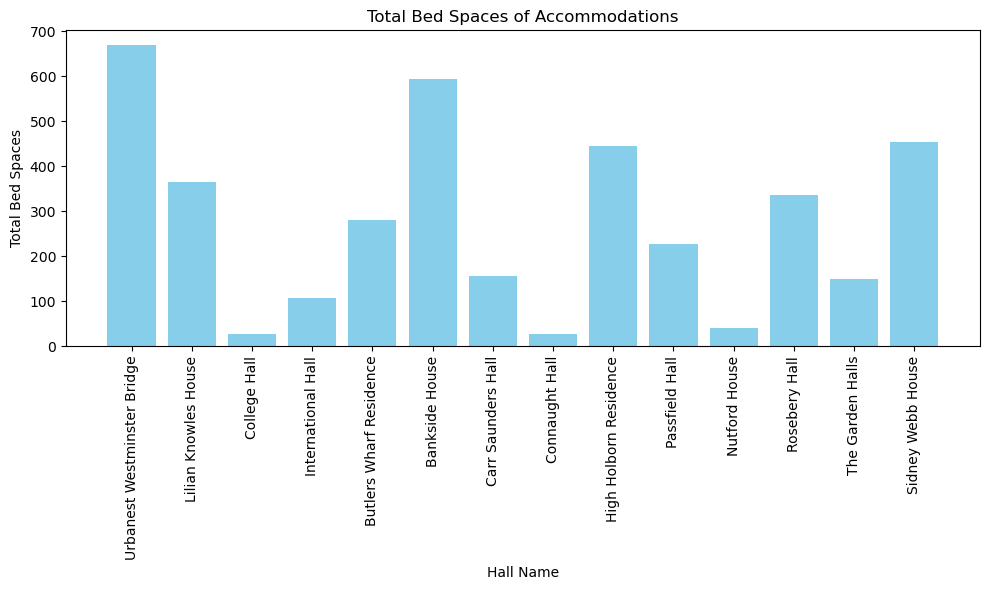

In [84]:
plt.figure(figsize=(10, 6))
hall_names = [link.split('/')[-2].replace('-', ' ').title() for link in df['Hyperlink']]
plt.bar(hall_names, df['Total Bed Spaces'], color='skyblue')
plt.xlabel('Hall Name')
plt.ylabel('Total Bed Spaces')
plt.title('Total Bed Spaces of Accommodations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()